In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.autograd import Variable

In [2]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline
torch.manual_seed(4)

### Activation Functions :


Activation functions are mathematical operations applied to the output of a neuron or node in a neural network. They introduce non-linearity to the network, enabling it to model complex relationships and solve a wide range of tasks.

In [3]:
x = torch.linspace(5, -5, 200)

In [4]:
x

tensor([ 5.0000,  4.9497,  4.8995,  4.8492,  4.7990,  4.7487,  4.6985,  4.6482,
         4.5980,  4.5477,  4.4975,  4.4472,  4.3970,  4.3467,  4.2965,  4.2462,
         4.1960,  4.1457,  4.0955,  4.0452,  3.9950,  3.9447,  3.8945,  3.8442,
         3.7940,  3.7437,  3.6935,  3.6432,  3.5930,  3.5427,  3.4925,  3.4422,
         3.3920,  3.3417,  3.2915,  3.2412,  3.1910,  3.1407,  3.0905,  3.0402,
         2.9899,  2.9397,  2.8894,  2.8392,  2.7889,  2.7387,  2.6884,  2.6382,
         2.5879,  2.5377,  2.4874,  2.4372,  2.3869,  2.3367,  2.2864,  2.2362,
         2.1859,  2.1357,  2.0854,  2.0352,  1.9849,  1.9347,  1.8844,  1.8342,
         1.7839,  1.7337,  1.6834,  1.6332,  1.5829,  1.5327,  1.4824,  1.4322,
         1.3819,  1.3317,  1.2814,  1.2312,  1.1809,  1.1307,  1.0804,  1.0302,
         0.9799,  0.9296,  0.8794,  0.8291,  0.7789,  0.7286,  0.6784,  0.6281,
         0.5779,  0.5276,  0.4774,  0.4271,  0.3769,  0.3266,  0.2764,  0.2261,
         0.1759,  0.1256,  0.0754,  0.02

In [5]:
x = Variable(x)

In [6]:
x

tensor([ 5.0000,  4.9497,  4.8995,  4.8492,  4.7990,  4.7487,  4.6985,  4.6482,
         4.5980,  4.5477,  4.4975,  4.4472,  4.3970,  4.3467,  4.2965,  4.2462,
         4.1960,  4.1457,  4.0955,  4.0452,  3.9950,  3.9447,  3.8945,  3.8442,
         3.7940,  3.7437,  3.6935,  3.6432,  3.5930,  3.5427,  3.4925,  3.4422,
         3.3920,  3.3417,  3.2915,  3.2412,  3.1910,  3.1407,  3.0905,  3.0402,
         2.9899,  2.9397,  2.8894,  2.8392,  2.7889,  2.7387,  2.6884,  2.6382,
         2.5879,  2.5377,  2.4874,  2.4372,  2.3869,  2.3367,  2.2864,  2.2362,
         2.1859,  2.1357,  2.0854,  2.0352,  1.9849,  1.9347,  1.8844,  1.8342,
         1.7839,  1.7337,  1.6834,  1.6332,  1.5829,  1.5327,  1.4824,  1.4322,
         1.3819,  1.3317,  1.2814,  1.2312,  1.1809,  1.1307,  1.0804,  1.0302,
         0.9799,  0.9296,  0.8794,  0.8291,  0.7789,  0.7286,  0.6784,  0.6281,
         0.5779,  0.5276,  0.4774,  0.4271,  0.3769,  0.3266,  0.2764,  0.2261,
         0.1759,  0.1256,  0.0754,  0.02

In [7]:
numpy_x = x.data.numpy()

In [8]:
numpy_x

array([ 5.        ,  4.9497485 ,  4.8994975 ,  4.849246  ,  4.798995  ,
        4.7487435 ,  4.6984925 ,  4.648241  ,  4.59799   ,  4.5477386 ,
        4.4974875 ,  4.447236  ,  4.396985  ,  4.3467336 ,  4.2964826 ,
        4.246231  ,  4.19598   ,  4.1457286 ,  4.0954776 ,  4.045226  ,
        3.9949749 ,  3.9447236 ,  3.8944724 ,  3.844221  ,  3.7939699 ,
        3.7437186 ,  3.6934674 ,  3.6432161 ,  3.5929646 ,  3.5427136 ,
        3.4924622 ,  3.4422112 ,  3.3919597 ,  3.3417087 ,  3.2914572 ,
        3.2412062 ,  3.1909547 ,  3.1407037 ,  3.0904522 ,  3.040201  ,
        2.9899497 ,  2.9396985 ,  2.8894472 ,  2.839196  ,  2.7889447 ,
        2.7386935 ,  2.6884422 ,  2.638191  ,  2.5879397 ,  2.5376885 ,
        2.4874372 ,  2.437186  ,  2.3869348 ,  2.3366835 ,  2.286432  ,
        2.2361808 ,  2.1859295 ,  2.1356783 ,  2.085427  ,  2.0351758 ,
        1.9849246 ,  1.9346733 ,  1.8844221 ,  1.8341708 ,  1.7839196 ,
        1.7336683 ,  1.6834171 ,  1.6331658 ,  1.5829146 ,  1.53

### ReLU ( Rectified Linear Unit ) :

The ReLU activation function replaces negative input values with zero while leaving positive values unchanged which introduces non-linearity and aids in avoiding vanishing gradient problems during neural network training.

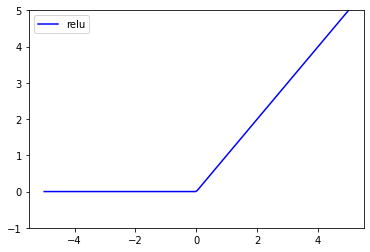

In [9]:
y_relu = f.relu(x).data.numpy()

plt.plot(numpy_x, y_relu, c = 'blue', label = 'relu')
plt.ylim(-1, 5)
plt.legend(loc = 'best')
plt.show()

### Tanh Function :

Tanh function transforms inputs to values between -1 and 1, introducing non-linearity and symmetry around zero. It's commonly used in neural networks for its bounded output range and suitability for certain architectures like recurrent neural networks (RNNs).

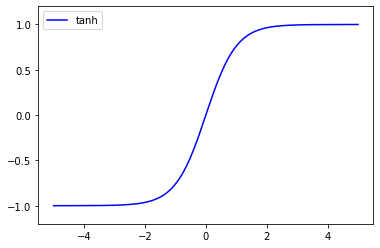

In [10]:
y_tanh = f.tanh(x).data.numpy()

plt.plot(numpy_x, y_tanh, c = 'blue', label = 'tanh')
plt.ylim(-1.2, 1.2)
plt.legend(loc = 'best')
plt.show()

### Sigmoid Function :

Sigmoid function transforms input values to a range between 0 and 1, suitable for representing probabilities. The curve is S-shaped, with positive inputs mapping to values close to 1, negative inputs to values near 0, and inputs around zero to values near 0.5. It's particularly useful in binary classification tasks but can have vanishing gradient problems for extreme inputs.

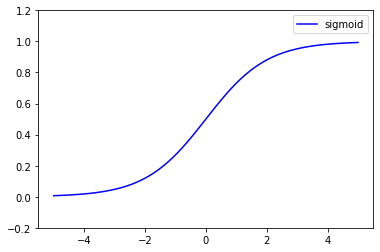

In [11]:
y_sigmoid = f.sigmoid(x).data.numpy()

plt.plot(numpy_x, y_sigmoid, c = 'blue', label = 'sigmoid')
plt.ylim(-0.2, 1.2)
plt.legend(loc = 'best')
plt.show()

### Softplus Function :


Softplus function produces positive values by applying the natural logarithm to the exponential of the input plus one. It introduces non-linearity, resembles the ReLU function for positive inputs, and is often used when outputs don't need to be bounded.

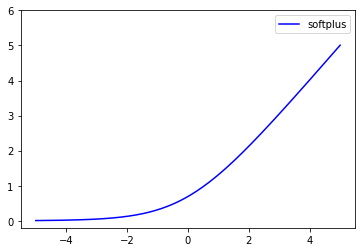

In [12]:
y_softplus = f.softplus(x).data.numpy()

plt.plot(numpy_x, y_softplus, c = 'blue', label = 'softplus')
plt.ylim(-0.2, 6)
plt.legend(loc = 'best')
plt.show()